In [1]:
using CSV
""" Provided you have a saved and valid .csv file in your current working directory, you may 
    load this file as a Dataframe using the following syntax. 
"""
iris = CSV.read("iris_data.csv")
iris = iris[1:150,1:5]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,String
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [2]:
data = [x for x in zip(iris[4], iris[1], iris[5])];

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[2]:1
└ @ Core In[2]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[2]:1
└ @ Core In[2]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[2]:1
└ @ Core In[2]:1


In [31]:
X = [p[1] for p in data]
Y = [p[2] for p in data]

function count_left(feature, split, species)
    return sum([1.0 for x in data if x[3] == species && x[feature] < split])
end

function count_right(feature, split, species)
    return sum([1.0 for x in data if x[3] == species && x[feature] > split])
end

function total_count_left(feature, split)
    return sum([1.0 for x in data if x[feature] < split])
end

function total_count_right(feature, split)
    return sum([1.0 for x in data if x[feature] > split])
end

function right_ratio(feature, split, species)
    return count_right(feature, split, species)/total_count_right(feature, split)
end

function left_ratio(feature, split, species)
    return count_left(feature, split, species)/total_count_left(feature, split)
end

left_ratio (generic function with 1 method)

In [58]:
sort!(X)
temp = []
for x in X
    sleft = sum([1.0 for p in data if p[1] < x - 0.001])
    
    left = (sleft/150)*(1 - sum([left_ratio(1, x - 0.001, species)^2 
        for species in ["setosa", "versicolor", "virginica"]]))
    right = (150 - sleft/150)*(1 - sum([right_ratio(1, x -0.001, species)^2 
        for species in ["setosa", "versicolor", "virginica"]]))
    push!(temp, (x - 0.001, left + right))
end

In [59]:
sort!(temp, by = x->x[2])
temp

150-element Array{Any,1}:
 (1.899, 0.471264367816092) 
 (1.899, 0.471264367816092) 
 (1.899, 0.471264367816092) 
 (1.899, 0.471264367816092) 
 (1.899, 0.471264367816092) 
 (1.999, 0.5068870523415978)
 (1.999, 0.5068870523415978)
 (1.999, 0.5068870523415978)
 (1.999, 0.5068870523415978)
 (1.999, 0.5068870523415978)
 (1.999, 0.5068870523415978)
 (2.099, 0.5459317585301837)
 (2.099, 0.5459317585301837)
 ⋮                          
 (0.199, 99.85889813713831) 
 (0.199, 99.85889813713831) 
 (0.199, 99.85889813713831) 
 (0.199, 99.85889813713831) 
 (0.199, 99.85889813713831) 
 (0.199, 99.85889813713831) 
 (0.199, 99.85889813713831) 
 (0.099, NaN)               
 (0.099, NaN)               
 (0.099, NaN)               
 (0.099, NaN)               
 (0.099, NaN)               

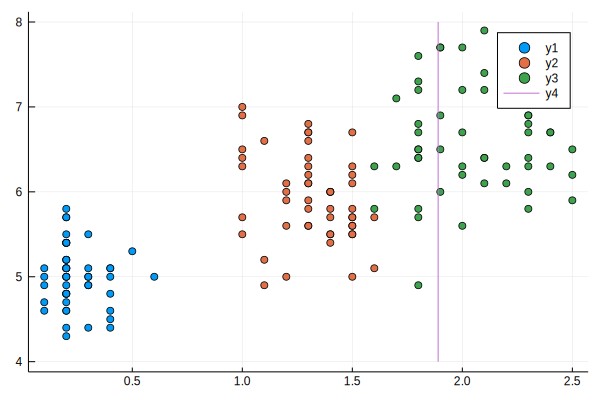

In [60]:
using Plots
scatter([ p for p in zip(X[1:50], Y[1:50])])
scatter!([ p for p in zip(X[51:100], Y[51:100])])
scatter!([ p for p in zip(X[101:150], Y[101:150])])
plot!([(1.89, 4.0), (1.89, 8.0)])

In [6]:
for v in X
    sL = sum([1.0 for x in X if x < v])
    sR = sum([1.0 for x in X if x >= v])
    entropy(50/150) - sum([])

0.9182958340544896

In [ ]:
X = [x for x in points_x if x[2] >.5]
sort!(X, by = x -> x[1])
Y = [x for x in points_y if x[2] >.5]
sort!(Y, by = x -> x[1])
Y[1]

In [ ]:
p_temp = [p for p in points_y if p[2] == 0.6644]
sort!(p_temp, by= x->x[1])
y1 = p_temp[1][1]
p_temp

In [ ]:
scatter([x for x in zip(iris[1:50, 1], iris[1:50, 2])])
scatter!([x for x in zip(iris[51:100, 1], iris[51:100, 2])])
scatter!([x for x in zip(iris[101:150, 1], iris[101:150, 2])])
plot!([(4.0, 3.1), (8.0, 3.1)])

In [ ]:
iris_new = [p for p in data]

points_x = []
for x in iris[:, 1]
    N_m = sum([1.0 for p in data if p[1] <= x])
    p̂_m_versicolor = sum([p[3] == "versicolor" ? 1.0 : 0.0 for p in data if p[1] < x])/N_m
    p̂_m_setosa = sum([p[3] == "setosa" ? 1.0 : 0.0 for p in data if p[1] < x])/N_m
    p̂_m_virginica = sum([p[3] == "virginica" ? 1.0 : 0.0 for p in data if p[1] < x])/N_m
    gini  = p̂_m_versicolor*(1.0 - p̂_m_versicolor) + p̂_m_setosa*(1.0 - p̂_m_setosa) + p̂_m_virginica*(1.0 - p̂_m_virginica)
    push!(points_x, (x, gini))
end
sort!(points_x, by = x->x[2])

points_y = []
for y in iris[:, 2]
    N_m = sum([1.0 for p in data if p[2] <= y])
    p̂_m_versicolor = sum([p[3] == "versicolor" ? 1.0 : 0.0 for p in data if p[2] < y])/N_m
    p̂_m_setosa = sum([p[3] == "setosa" ? 1.0 : 0.0 for p in data if p[2] < y])/N_m
    p̂_m_virginica = sum([p[3] == "virginica" ? 1.0 : 0.0 for p in data if p[2] < y])/N_m
    gini  = p̂_m_versicolor*(1.0 - p̂_m_versicolor) + p̂_m_setosa*(1.0 - p̂_m_setosa) + p̂_m_virginica*(1.0 - p̂_m_virginica)
    push!(points_y, (y, gini))
end
sort!(points_y, by = x->x[2]) 

In [ ]:
maximum([x[2] for x in points])

In [ ]:
for p in points
    if p[2] == .5
        println(p)
    end
end

In [ ]:
points[17]

In [ ]:
sort!(points, by = x ->x[2])
plot([x for x in points])

In [ ]:
points[end]

In [ ]:
points_x = []
for x in iris[:, 1]
    if x < x1
        N_m = sum([1.0 for p in data if p[1] <= x])
        p̂_m_versicolor = sum([p[3] == "versicolor" ? 1.0 : 0.0 for p in data if p[1] < x])/N_m
        p̂_m_setosa = sum([p[3] == "setosa" ? 1.0 : 0.0 for p in data if p[1] < x])/N_m
        p̂_m_virginica = sum([p[3] == "virginica" ? 1.0 : 0.0 for p in data if p[1] < x])/N_m
        gini  = p̂_m_versicolor*(1.0 - p̂_m_versicolor) + p̂_m_setosa*(1.0 - p̂_m_setosa) + p̂_m_virginica*(1.0 - p̂_m_virginica)
        push!(points_x, (x, gini))
    end
end
sort!(points_x, by = x->x[2])

points_y = []
for y in iris[:, 2]
    N_m = sum([1.0 for p in data if p[2] <= y])
    p̂_m_versicolor = sum([p[3] == "versicolor" ? 1.0 : 0.0 for p in data if p[2] < y])/N_m
    p̂_m_setosa = sum([p[3] == "setosa" ? 1.0 : 0.0 for p in data if p[2] < y])/N_m
    p̂_m_virginica = sum([p[3] == "virginica" ? 1.0 : 0.0 for p in data if p[2] < y])/N_m
    gini  = p̂_m_versicolor*(1.0 - p̂_m_versicolor) + p̂_m_setosa*(1.0 - p̂_m_setosa) + p̂_m_virginica*(1.0 - p̂_m_virginica)
    push!(points_y, (y, gini))
end
sort!(points_y, by = x->x[2])

In [ ]:
for x in points_x
    if x[2] == .4999
        println(x)
    end
end

In [ ]:
for y in points_y
    if y[2] == .4999
        println(y)
    end
end

In [ ]:
points_y